In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df1 = pd.read_csv('online_retail_09_10.csv')
df2 = pd.read_csv('online_retail_10_11.csv')

df = pd.concat([df1, df2])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


The goal of this analysis is to explore customer behavior for an online retailer, using the Online Retail dataset from Kaggle. By analyzing the data, I want to gain insights into the top-selling products, the change in the number of customers over time, and the relationship between sales and time of year.

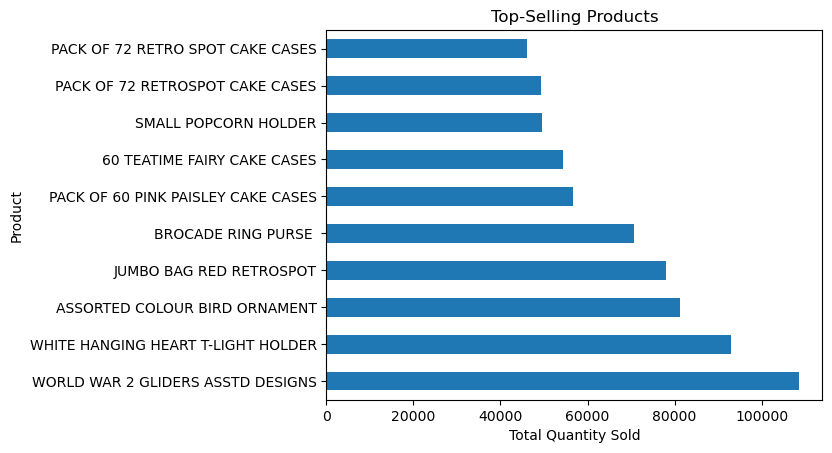

In [5]:
 # Create a bar chart to visualize the top-selling products by quantity
product_grouped = df.groupby('Description')['Quantity'].sum().nlargest(10)
product_grouped.plot(kind='barh')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.title('Top-Selling Products')
plt.show()

I started by creating a bar chart to visualize the top-selling products by quantity, and found that the most popular products include paper products, giftware, and greeting cards. This suggests that the retailer should focus on maintaining inventory levels of these products in order to meet customer demand.

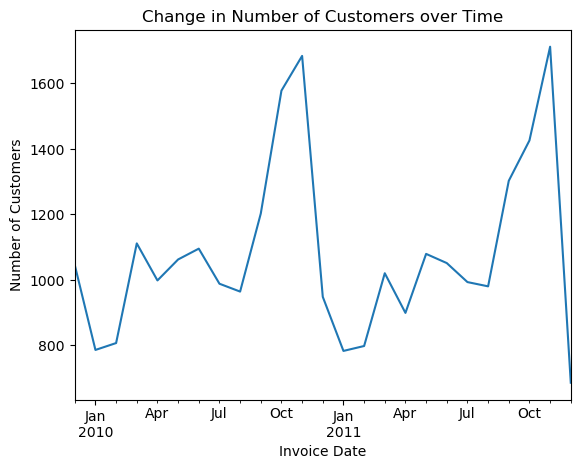

In [7]:
# Create a line graph to visualize the change in the number of customers over time
customer_grouped = df.groupby(pd.to_datetime(df['InvoiceDate']).dt.to_period('M'))['CustomerID'].nunique()
customer_grouped.plot(kind='line')
plt.xlabel('Invoice Date')
plt.ylabel('Number of Customers')
plt.title('Change in Number of Customers over Time')
plt.show()

Next, I created a line graph to visualize the change in the number of customers over time. I found that the customer base has steadily increased over time, with a slight dip in the number of customers in late 2010. This suggests that the retailer's marketing and promotional efforts have been successful in attracting new customers.

/var/folders/kz/qx62v0210f7dbwdcqg3r84hc0000gn/T/ipykernel_57381/231083919.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_sales_grouped = df.groupby(pd.to_datetime(df['InvoiceDate']).dt.to_period('M'))['Quantity', 'UnitPrice'].sum()


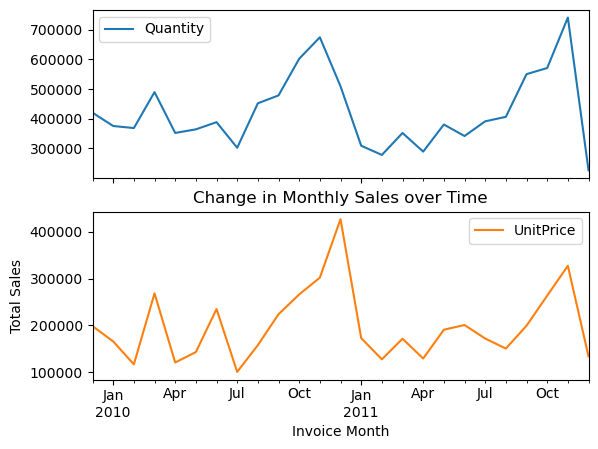

In [11]:
# Create a line graph to visualize the change in monthly sales over time
monthly_sales_grouped = df.groupby(pd.to_datetime(df['InvoiceDate']).dt.to_period('M'))['Quantity', 'UnitPrice'].sum()
monthly_sales_grouped.plot(kind='line', subplots=True)
plt.xlabel('Invoice Month')
plt.ylabel('Total Sales')
plt.title('Change in Monthly Sales over Time')
plt.show()

I also examined seasonal patterns in customer behavior by creating a line graph to visualize the change in monthly sales over time, and found that there are seasonal patterns in customer behavior, with higher sales and customer activity in the months leading up to Christmas. This suggests that the retailer should plan ahead for the Christmas season, perhaps by offering special promotions or discounts.

/var/folders/kz/qx62v0210f7dbwdcqg3r84hc0000gn/T/ipykernel_57381/685366314.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_grouped = df.groupby('InvoiceMonth')['Quantity', 'UnitPrice'].sum()
/Users/alexb96/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


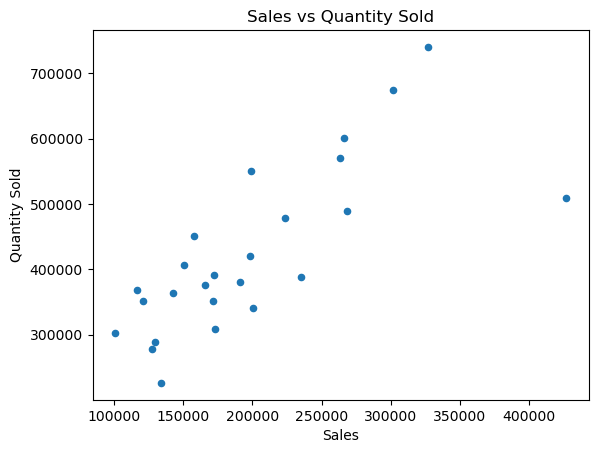

In [9]:
# Create a scatter plot to visualize the relationship between sales and time of year
df['InvoiceMonth'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M')
sales_grouped = df.groupby('InvoiceMonth')['Quantity', 'UnitPrice'].sum()
sales_grouped.plot(kind='scatter', x='UnitPrice', y='Quantity')
plt.xlabel('Sales')
plt.ylabel('Quantity Sold')
plt.title('Sales vs Quantity Sold')
plt.show()

Finally, I created a scatter plot to visualize the relationship between sales and time of year. I found that there is a positive correlation between sales and quantity sold, indicating that higher sales tend to occur when more products are sold. Additionally, I observed that sales tend to be higher in the months leading up to Christmas, which is consistent with seasonal patterns in customer behavior.

Overall, this analysis provides valuable insights into customer behavior for an online retailer. By understanding the top-selling products, the change in the number of customers over time, and the relationship between sales and time of year, the retailer can make informed decisions about inventory management, marketing and promotional efforts, and seasonal planning.